<a href="https://colab.research.google.com/github/Stella-kimani/R-project/blob/master/Moringa_Week12_Stella_Kimani_R_Advertising_Dataset_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction

#a.Research Question

As a Data Science Consultant i have been tasked by a kenyan entrepreneur to help her identify which individuals are most likely to click on her ads. 

This Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog.

#2.Understanding the context

Online ads have become a daily part of internet life.Online advertising is much more fluid and dynamic than simple print ads. Online ads can and should be precise in who they target, going only to viewers based on location, age, interests, or other demographics relevant to the business. 
The ‘click’ goes to the business’s homepage or a content-specific landing page.

Types of Online Ads;

1.Google Adwords > These ads appear on Google search result pages, on the side, for businesses pertaining to the search criteria and for the demographic parameters. These  usually are effective for campaigns based on specific keywords.

2.Search Ads > These are similar to Google Adwords, except these ads appear as search results (usually top results) instead of on the side.


 


#3.Loading the dataset and checking through the dataset

In [1]:
# Load R environment
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
#Installing necesary  package 
%%R
install.packages("data.table")#This package provides an enhanced version of a data frame which are structures for storing data in base R.
require(data.table)


In [ ]:
%%R
install.packages("vioplot")
require(vioplot)
library(vioplot)# This library enables us to plot violin plots from our data.I will do this in EDA.


In [6]:
#Loading dataset 
%%R
df <- fread('/content/advertising.csv')

In [12]:
#Preview of the head of our dataset
%%R
head(df)

print(head(df))

   Daily Time Spent on Site Age Area Income Daily Internet Usage
1:                    68.95  35    61833.90               256.09
2:                    80.23  31    68441.85               193.77
3:                    69.47  26    59785.94               236.50
4:                    74.15  29    54806.18               245.89
5:                    68.37  35    73889.99               225.58
6:                    59.99  23    59761.56               226.74
                           Ad Topic Line           City Male    Country
1:    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2:    Monitored national standardization      West Jodi    1      Nauru
3:      Organic bottom-line service-desk       Davidton    0 San Marino
4: Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5:         Robust logistical utilization   South Manuel    0    Iceland
6:       Sharable client-driven software      Jamieberg    1     Norway
             Timestamp Clicked on Ad
1: 2

This gives the first 6 entries in the dataset

In [13]:
#Preview of the dataset
%%R
print(df)

      Daily Time Spent on Site Age Area Income Daily Internet Usage
   1:                    68.95  35    61833.90               256.09
   2:                    80.23  31    68441.85               193.77
   3:                    69.47  26    59785.94               236.50
   4:                    74.15  29    54806.18               245.89
   5:                    68.37  35    73889.99               225.58
  ---                                                              
 996:                    72.97  30    71384.57               208.58
 997:                    51.30  45    67782.17               134.42
 998:                    51.63  51    42415.72               120.37
 999:                    55.55  19    41920.79               187.95
1000:                    45.01  26    29875.80               178.35
                              Ad Topic Line           City Male
   1:    Cloned 5thgeneration orchestration    Wrightburgh    0
   2:    Monitored national standardization      West Jo

This is a summary showing the first 6 and last 6 entries in the dataset.

In [15]:
#Let's display the structure of the dataset.
%%R
str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


The str() function in R displays the internal structure of a given dataset.

In [16]:
#Let's get the dimension of our dataset
%%R
dim(df)

[1] 1000   10


The dim() function in R Language is used to get or set the dimension of the specified matrix, array or data frame.
The dataset has 1000 rows and 10 columns.

In [17]:
#Getting the class of the dataframe
%%R
class(df)

[1] "data.table" "data.frame"


The function class() can be used to assess the class attribute of a dataset in R.

In [23]:
#Summary of the advertising dataset
%%R
summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

Summary() is a generic function used to produce result summaries of the dataframe.

In [18]:
#Columns of the advertising dataset
%%R
names(df)

 [1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"           


Dataset External validation

This dataset is valid and can be found here.

https://www.kaggle.com/homelesssandwich/analysis-of-advertising-data

This is a descriprion of the columns.

1.Daily Time Spent on a Site -Time spent by the user on a site in minutes.

2.Age-	Customer's age in terms of years.

3.Area Income-	Average income of geographical area of consumer.

4.Daily Internet Usage	-Average minutes in a day consumer is on the internet.

5.Ad Topic Line-	Headline of the advertisement.

6.City	-City of the consumer.\

7.Male	-Whether or not a consumer was male.

8.Country-	Country of the consumer.

9.Timestamp	-Time at which user clicked on an Ad or the closed window.

10.Clicked on Ad	0 or 1 is indicated clicking on an Ad.

There are 10 columns in the dataset.

In [145]:
#Check for duplicates
%%R
duplicated_df <- df[duplicated(df),]
print(duplicated_df)


Empty data.table (0 rows and 10 cols): Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City...


In [150]:
#Check for unique values
%%R
unique_df <- unique(df)
unique_df


      Daily Time Spent on Site Age Area Income Daily Internet Usage
   1:                    68.95  35    61833.90               256.09
   2:                    80.23  31    68441.85               193.77
   3:                    69.47  26    59785.94               236.50
   4:                    74.15  29    54806.18               245.89
   5:                    68.37  35    73889.99               225.58
  ---                                                              
 996:                    72.97  30    71384.57               208.58
 997:                    51.30  45    67782.17               134.42
 998:                    51.63  51    42415.72               120.37
 999:                    55.55  19    41920.79               187.95
1000:                    45.01  26    29875.80               178.35
                              Ad Topic Line           City Male
   1:    Cloned 5thgeneration orchestration    Wrightburgh    0
   2:    Monitored national standardization      West Jo

In [21]:
#Check for null values
%%R
null_df <- is.null(df)
null_df

[1] FALSE


There are no null values in the dataset.

#4.Outlier Detection

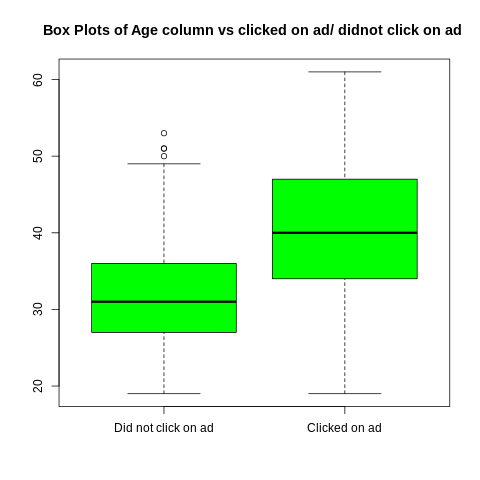

In [162]:
#Plot Box Plots to find outliers
%%R
Age_0 <- df$Age[df$`Clicked on Ad`==0]
Age_1 <- df$Age[df$`Clicked on Ad`==1]
boxplot(Age_0, Age_1,names=c("Did not click on ad","Clicked on ad"),
        col="green")
title("Box Plots of Age column vs clicked on ad/ didnot click on ad ")


Box plots are great they are a graphical display for describing the distribution of the data.From the plot the outliers are the data points located outside the whiskers of the box plot in the Did not click on Ad plot.
However since we are predicting whether an individual clicked on an ad or not,i will not remove these outliers.

In [27]:
# print out the outlier
%%R
boxplot.stats(Age_0)$out

[1] 53 51 51 50


#5.Univariate Analysis

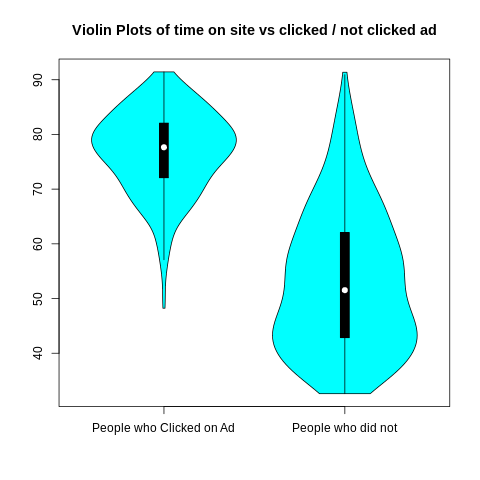

In [12]:
#Violin plot
%%R

time_1 <- df$`Daily Time Spent on Site`[df$`Clicked on Ad`==1]
time_0 <- df$`Daily Time Spent on Site`[df$`Clicked on Ad`==0]
vioplot(time_0, time_1,names=c("People who Clicked on Ad", "People who did not"),
        col="cyan")
title("Violin Plots of time on site vs clicked / not clicked ad")



From the violin plot we see there is a difference in the shape of the plot for clicked on Ad and plot for didnot click on Ad.
It also seems that the didnot click on Ad plot has more values than the clicked on Ad plot.Wider sections of the violin plot usually represents a higher probability of observations taking values.

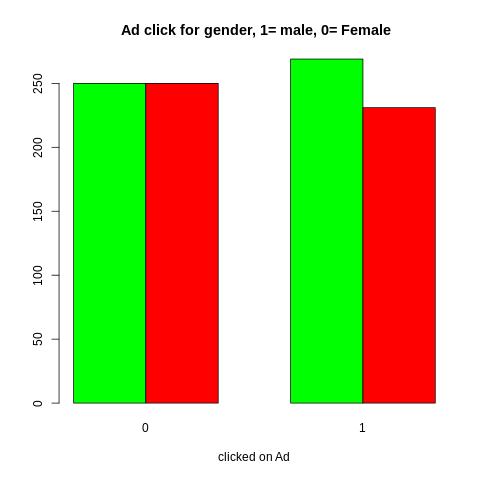

In [14]:
#Plotting a barplot.
%%R
Ads_clicked_on = table(df$Male,df$`Clicked on Ad`)
barplot(Ads_clicked_on,main=" Ad click for gender, 1= male, 0= Female",xlab="clicked on Ad",col=c("green","red"),beside=TRUE, legends=TRUE)



The count for male who clicked on ads is higher than the count for females who clicked on the ads.

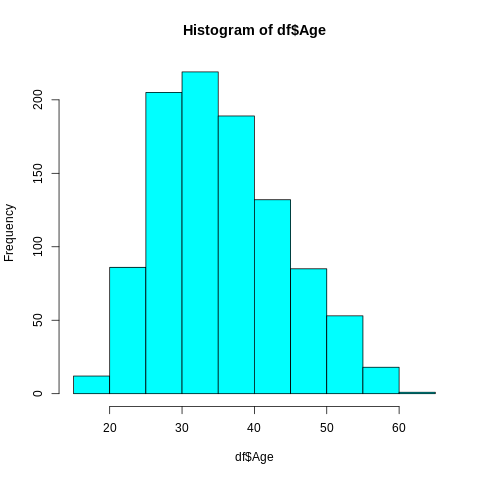

In [10]:
#Plot a histogram of the age column.
%%R
#plot_histogram(df$Age)#No color
hist(df$`Age`,col="cyan")


From this histogram it shows that majority of the people were between 30 - 40 years old.The minum age in this study is below 20.
It is a positively skewed plot since age cannot be negative.

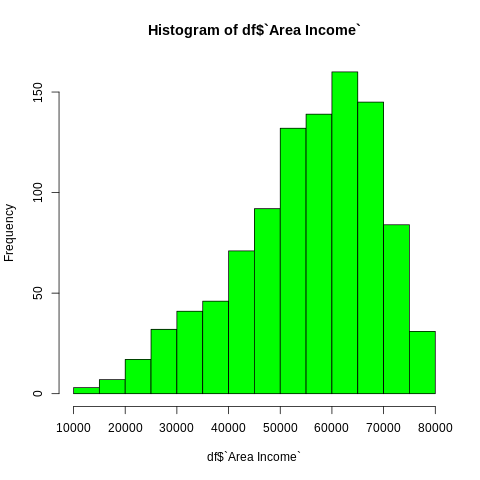

In [192]:
#Plot a histogram of the Area Income column.
%%R
hist(df$`Area Income`,col="green")


From the plot above the highest income is between 60,000 to 70,000.This is the highest count for average income of geographical area of consumer.
The plot is negatively skewed.

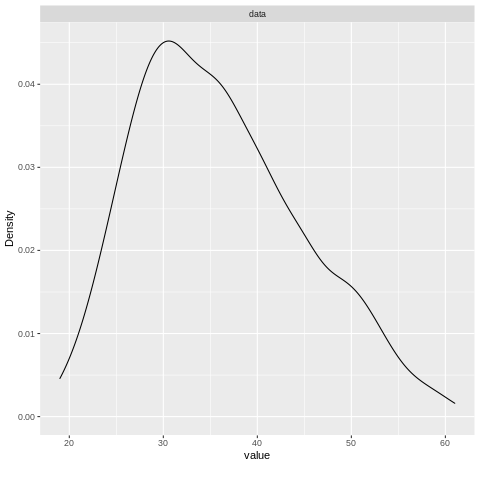

In [30]:
%%R

plot_density(df$Age)

Majority of the people in this dataset were between 30 - 40 years.A few people were more than 60 years old.

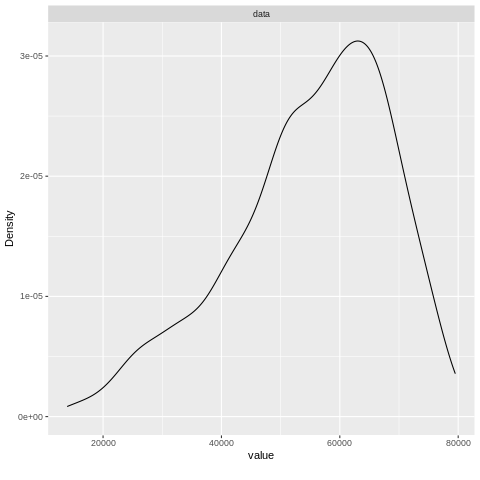

In [31]:
#Plot a density bar of Area income.
%%R
plot_density(df$`Area Income`)

From the plot above the Average income of geographical area of consumer is highest at a value of between 60,000 to 70,000.

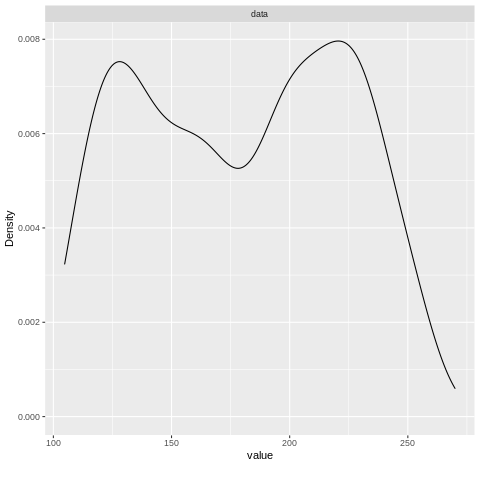

In [32]:
%%R
plot_density(df$`Daily Internet Usage`)

The daily internet usage density plot shows that is bimodal and that the highest average minutes in a day consumer is on the internet are between 200- 250 minutes and 115 to 150  minutes.

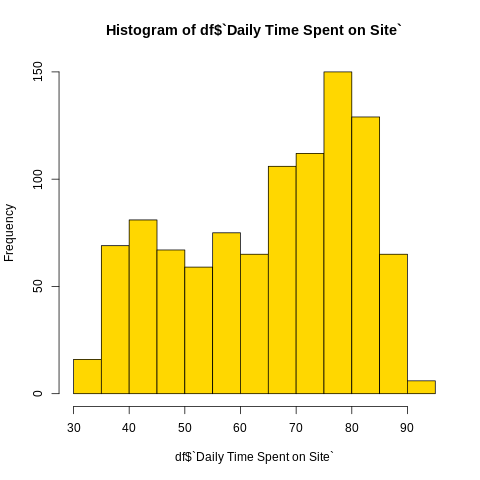

In [152]:
%%R
#plot_histogram(df$`Daily Time Spent on Site`)#Has no color
hist(df$`Daily Time Spent on Site`,col="gold")

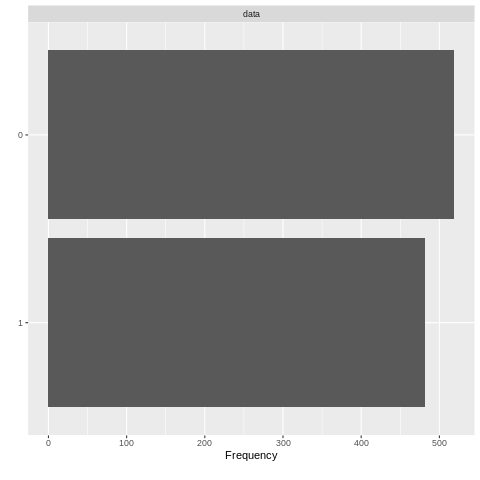

In [158]:
%%R
plot_bar(df$Male)


The female count represented by 0 is higher than male count which is represented by 1.This means that there is a higher number of females compared to male  in the study

#Mean

In [44]:
%%R
# Find the mean for Age column 
Age_mean <- mean(df$Age)
Age_mean

[1] 36.009


In [50]:
%%R
# Find the mean for Daily Time Spent on Site column 
Time_mean <- mean(df$`Daily Time Spent on Site`)
Time_mean

[1] 65.0002


 The mean of the daily time spent on the site is 65 min

In [51]:
%%R
# Find the mean Area Income for column 
Income_mean <- mean(df$`Area Income`)
Income_mean

[1] 55000


In [52]:
%%R
# Find the mean Daily Internet Usage 
Internet_use_mean <- mean(df$`Daily Internet Usage`)
Internet_use_mean

[1] 180.0001


 The mean amount of min of daily internet usage is 180 

#Median

In [54]:
%%R
# Find the median for Daily Internet Usage 
Internet_use_median <- median(df$`Daily Internet Usage`)
Internet_use_median

[1] 183.13


In [55]:
%%R
# Find the median for Age column 
Age_median <- median(df$Age)
Age_median

[1] 35


In [56]:
%%R
# Find the median for Daily Time Spent on Site column 
Time_median <- median(df$`Daily Time Spent on Site`)
Time_median

[1] 68.215


In [57]:
%%R
# Find the median Area Income for column 
Income_median <- median(df$`Area Income`)
Income_median

[1] 57012.3


#Mode

In [59]:
# function to get the mode
%%R
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [66]:
%%R
Age_mode <- getmode(df$Age)
print(Age_mode)

[1] 31


The mode age for the people who clicked the ad is 31 years.

#Quantiles

In [164]:
# find the age quantiles
%%R
Age_quant <- quantile(df$Age)
print(Age_quant)

  0%  25%  50%  75% 100% 
  19   29   35   42   61 


In [172]:
# Find quantiles for Internet use
%%R
Net_quant <- quantile(df$`Daily Internet Usage`)
print(Net_quant)

      0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600 


In [173]:
#Find quantiles for Area Income
%%R
Income_quant <- quantile(df$`Area Income`)
print(Income_quant)

      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 


#Minimum

In [176]:
# Mininimum age 
%%R
Age_min <- min(df$Age)
print(Age_min)


[1] 19


Youngest age for person who saw the Ad

#Maximum

In [175]:
# Maximum age
%%R
Age_max <- max(df$Age)
print(Age_max)

[1] 61


Oldest age for person who saw the Ad

In [177]:
# find the range for Age column
%%R
Age_range <- range(df$Age)
print(Age_range )

[1] 19 61


In [178]:

# find the range for Daily Time Spent on Site column
%%R
Time_range <- range(df$`Daily Time Spent on Site`)
print(Time_range)

[1] 32.60 91.43


Time spent on the online cryptography course site ranged from 32.60 minutes to 91.43 minutes

#7.Bivariate Analysis

# Covariance

This measures the directional relationship between two variables.A positive covariance means that the two variables move in the same direction and a negative covariance means they move inversely.

In [16]:
#Finding the covariance between the DailyTime Spent on Site and Daily Internet Usage
%%R
time_ad_c <- df$`Daily Time Spent on Site`
net_usage_c <- df$`Daily Internet Usage`
cov(time_ad_c,net_usage_c)


[1] 360.9919


There is a high covariance of 360 which indicates a positive relationship between the Daily Time Spent on Site and Daily Internet Usage.

In [135]:
#Covariance between the Age column and Clicked on Ad column.
%%R
Age_cov_c <- df$Age
Ad_cov_c <- df$`Clicked on Ad`
cov(Age_cov_c,Ad_cov_c)

[1] 2.164665


There is a very low covariance between Age  and Clicked on Ad column as indicated by the low value.

In [134]:
#Covariance between the Area Income and Clicked on Ad column.
%%R
Area_cov_c <- df$`Area Income`
Ad_cov_c <- df$`Clicked on Ad`
cov(Area_cov_c,Ad_cov_c)

[1] -3195.989


This is a negative covariance and shows that the Area Income column and the Clicked on Ad column are inversely related.

#Correlation

 Shows the measurement of how variables two are linearly related and therefore shows the statistical relationship.

In [107]:
#Lets find the correlation between various Numerical columns.
%%R

x <- round(cor(select_if(df, is.numeric)), 2)
res <- cor(x)
corr <- round(res,2)
print(corr)

                         Daily Time Spent on Site   Age Area Income
Daily Time Spent on Site                     1.00 -0.80        0.69
Age                                         -0.80  1.00       -0.67
Area Income                                  0.69 -0.67        1.00
Daily Internet Usage                         0.88 -0.83        0.71
Male                                        -0.08 -0.14       -0.12
Clicked on Ad                               -0.95  0.85       -0.79
                         Daily Internet Usage  Male Clicked on Ad
Daily Time Spent on Site                 0.88 -0.08         -0.95
Age                                     -0.83 -0.14          0.85
Area Income                              0.71 -0.12         -0.79
Daily Internet Usage                     1.00 -0.02         -0.97
Male                                    -0.02  1.00         -0.01
Clicked on Ad                           -0.97 -0.01          1.00


The correlation between the variables and themselves is 1 as seen in the correlation summary.There is a strong positive relationship between Daily Time Spent on Site  and the Daily Internet Usage, as the correlation between the 2 variables is 0.88 meaning the more time spent on site the more likely it is one will use more internet on a daily basis.
There is a strong negative relationship between Daily Time Spent on Site and the Clicked on Ad column as shown by a correlation of -0.95

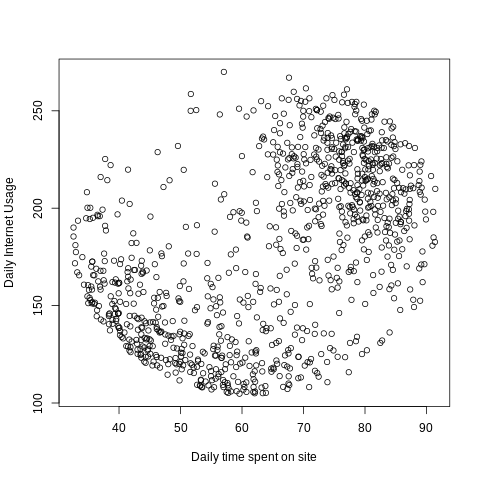

In [17]:
#Scatter plot between the Daily time spent on site and Daily Internet Usage
%%R
plot(time_ad_c,net_usage_c, xlab="Daily time spent on site",
     ylab="Daily Internet Usage")

From the scatter plot, it shows that the 2 variables are very highly correlated as shown by the data points pattern.It shows that one variable is related to the other.

#Multivariate Analysis

In [ ]:
%%R
install.packages("scatterplot3d")
library(scatterplot3d)# Enables us to plot a scatter3d plot

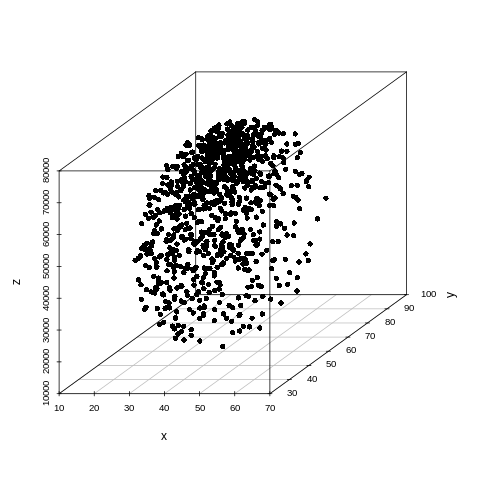

In [128]:
# Plotting a 3D scatter matrix
%%R
x <- df$Age
y <- df$`Daily Time Spent on Site`
z <- df$`Area Income`
grps <- as.factor(df$`Clicked on Ad`)
# Plot
library(scatterplot3d)
scatterplot3d(x, y, z, pch = 16)

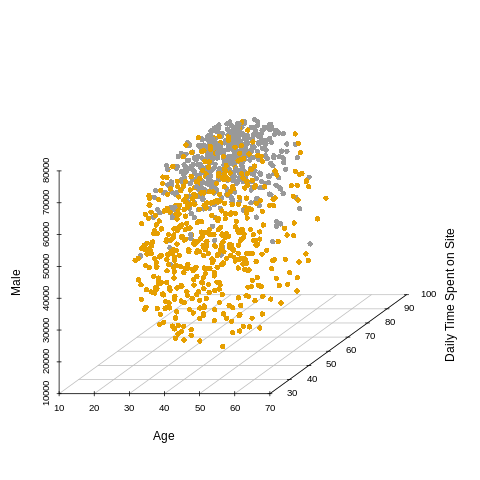

In [142]:
# Change color by groups
# add grids and remove the box around the plot
# Change axis labels: xlab, ylab and zlab
%%R
colors <- c("#999999", "#E69F00", "#56B4E9")
scatterplot3d(x, y, z, pch = 16, color = colors[grps],
              grid = TRUE, box = FALSE, xlab = "Age", 
              ylab = "Daily Time Spent on Site", zlab = "Male")


When data points tend to rise together this suggests a positive correlation.

Conclusion.

1.Most people involved in this study were between the age of 30-40 yrs from the univariate plots of the age column which suggests that young people love going online most likely to access information.These people in the agegroup 30-40 should be actively targeted when trying to advertise inorder for a business to be successful.Since we have seen there is a strong positive correlation between the time spent on the Internet and the Internet usage.So it is clear that users who spend more time on the internet also spend time on the site.

2.The average age of a person in this study is 36 years old, the youngest user is 19 and the oldest is 61 years old and therefore we conclude that the site is targetting adult users.Mid aged level are more inclined towards clicking on an ad than others.

3.More females were involved in this study than males.



